In [155]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import seaborn as sns  
sns.set_style('darkgrid')

### Dynamics for Priors
$prior_{t+1} = prior_t \cdot m + b$

where the attractor of the priors is $\frac{b}{1-m}$.



This means that error can be used to perturb the prior: 

$prior_{t+1} = (1 + error_t) \cdot prior_t \cdot m + b$ 

Of course, the values will have to be capped at 1 and 0 after error disturbance. An error of 0 will allow the prior to return to the stable attractor $\frac{b}{1-m}$. Let's first see what these dynamics look like without disturbance from error signals.


In [156]:
def dynamical(m, x, b, t):
    out = []
    for _ in range(t):
        out.append(x)
        x = m*x + b
    return out

##### !!!
__NOTE:__ In these experiments I arbitrarily initialize two priors at 0.1 and 0.9 to show that dynamic will move priors towards the attractor, regardless of where they are initialized.

attractor: 0.24909300736
b/1-m: 0.25


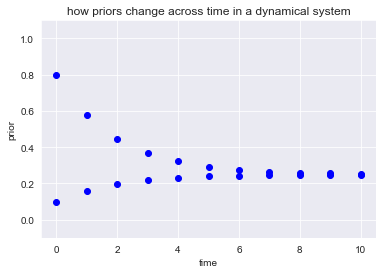

In [157]:
time = 11
m = 0.6
init = .1
alt_init = 0.8
b = .1
y = dynamical(m,init,b,time)
alt_y = dynamical(m,alt_init,b,time)
x = list(range(time))
plt.scatter(x, y, c="blue", label=f"m = {m}, b = {b}")
plt.scatter(x, alt_y, c="blue")
plt.ylim((-.1, 1.1)) 
plt.title("how priors change across time in a dynamical system")
plt.xlabel("time")
plt.ylabel("prior")
print("attractor:", y[-1])
print("b/1-m:", b/(1-m))

###  $m$ and $b$
Both the attractor and the rate of change towards the attractor can be manipulated with these variables. The next examples have the same attractor, with different rates at which they approach it. A reduced $m$ will cause a faster shift towards the attractor close to $b$.

attractor: 0.59951171875
b/1-m: 0.6


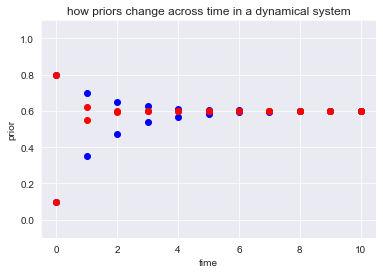

In [158]:

time = 11
x = list(range(time))

m = 0.5
init = .1
alt_init = 0.8
b = .3
y = dynamical(m,init,b,time)
alt_y = dynamical(m,alt_init,b,time)
plt.scatter(x, y, c="blue", label=f"m = {m}, b = {b}")
plt.scatter(x, alt_y, c="blue")

m1= 0.1
init1 = .1
alt_init1 = 0.8
b1 = .54
y1 = dynamical(m1,init1,b1,time)
alt_y1 = dynamical(m1,alt_init1,b1,time)
plt.scatter(x, y1, c="red", label=f"m = {m1}, b = {b1}")
plt.scatter(x, alt_y1, c="red")


plt.ylim((-.1, 1.1)) 
plt.title("how priors change across time in a dynamical system")
plt.xlabel("time")
plt.ylabel("prior")
print("attractor:", y[-1])
print("b/1-m:", b/(1-m))

### Error
You can see above how the prior naturally settles into a stable point and the $m$ and $b$ parameters can be manipulated to result in various attractors with difference rates of change. Error can also be incorporated to act as a disturbance to the system, shifting priors away from the attractor. Notice how a lower $m$ makes the prior more resistant to disturbances. 

In [374]:
def error_dynamical(m, x, b, t, var):
    error = np.random.uniform(-var,var,t)

    out = []
    for i in range(t):
        out.append(x)
        x = m*x*(1+error[i]) + b
    return out

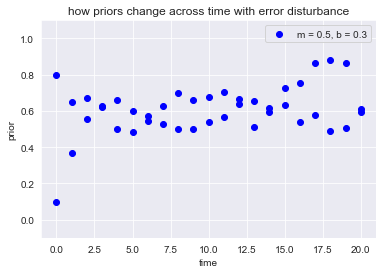

In [425]:
variance = .5
time = 21
x = list(range(time))

m = .5
b = .3
init = .1
alt_init = 0.8

y = error_dynamical(m,init,b,time,variance)
alt_y = error_dynamical(m,alt_init,b,time,variance)
plt.scatter(x, y, c="blue", label=f"m = {m}, b = {b}")
plt.scatter(x, alt_y, c="blue")

m1 = .1
b1 = .54
init1 = .1
alt_init1 = 0.8

y1 = error_dynamical(m1,init1,b1,time,variance)
alt_y1 = error_dynamical(m1,alt_init1,b1,time,variance)
plt.scatter(x, y1, c="red", label=f"m = {m1}, b = {b1}")
plt.scatter(x, alt_y1, c="red")

plt.ylim((-.1, 1.1)) 
plt.title("how priors change across time with error disturbance")
plt.xlabel("time")
plt.ylabel("prior")
plt.legend()

### Why use such a dynamic?
1. priors do not naturally drift towards 0 or 1 extremes
2. we can parameterize not only the base prior that an agent drifts towards, but how quickly and how resistant that prior is to noise
3. models can be updated to shift base priors to become more resistant to error or conformant to expectations
4. we can build an inverse model for agents to shift their base priors in order to shift the behaviors of others

How might this look? Below I will try to implement this with matrices and a state size > 1.

In [427]:
def triple_dynamical(w1, w2, w3, x, t, var):
    #error = np.linspace(-var,var,t)
    error = np.random.uniform(-var,var,t)

    out = []
    for i in range(t):
        out.append(x)
        x = x*w1 + error[i]*w2 + w3
    return out

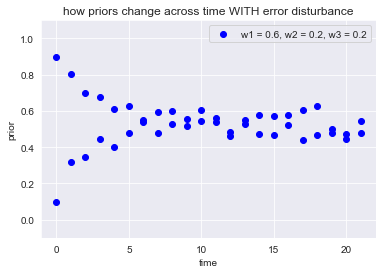

In [437]:
variance = .4
time = 22
x = list(range(time))

w1 = .6
w2 = .2
w3 = .2
init = .1
alt_init = 0.9

y = triple_dynamical(w1, w2, w3, init, time, variance)
alt_y = triple_dynamical(w1, w2, w3, alt_init, time, variance)
plt.scatter(x, y, c="blue", label=f"w1 = {w1}, w2 = {w2}, w3 = {w3}")
plt.scatter(x, alt_y, c="blue")

w11 = .2
w22 = .1
w33 = .7
init1 = .1
alt_init1 = 0.9
#y1 = triple_dynamical(w11, w22, w33, init1, time, variance)
#alt_y1 = triple_dynamical(w11, w22, w33, alt_init1, time, variance)
#plt.scatter(x, y1, c="red", label=f"w1 = {w11}, w2 = {w22}, w3 = {w33}")
#plt.scatter(x, alt_y1, c="red")

plt.ylim((-.1, 1.1)) 
plt.title("how priors change across time WITH error disturbance")
plt.xlabel("time")
plt.ylabel("prior")
plt.legend()

In [ ]:
model = np.array([[1,2],
                   [3,4]])
behav = np.array([2,1])
print(f"inputs: \n {model} \n x \n {behav}")
print(f"multiplication: \n{behav*model}")
print(f"dot product: \n{np.dot(behav,model)}")

In [ ]:
model = np.array([[1, 4],
                  [2, 5],
                  [3, 6]])
behav = np.array([[1,2,1],
                  [1,1,2]])
print(f"inputs: \n {model.T} \n x \n {behav}")
print(f"multiplication: \n{behav*model.T}")
print(f"dot product: \n{np.dot(behav,model)}")